Project 2- Prediction of Marks using Data Science 

1) Importing Required Modules

In [28]:
import pandas as pd #this helps in creating datfarames and reading data that we get from the csv files
import numpy as np #this helps in many numerical and array related operations used at the end
import matplotlib.pyplot as plot #this helps in plotting graphs using the given data

2) Importing Data from given URL

In [29]:
url = "http://bit.ly/w-data" #URL for data
s_data = pd.read_csv(url) #reading the data and storing in s_data
print("DATA IMPORTED") #prints when data is successfully imported
print ("Size of Given Data:", s_data.shape) #displays size of data
print("Given Data:\n", s_data.head(25)) #prints the data in tabular form

DATA IMPORTED
Size of Given Data: (25, 2)
Given Data:
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


3) Plotting given Data

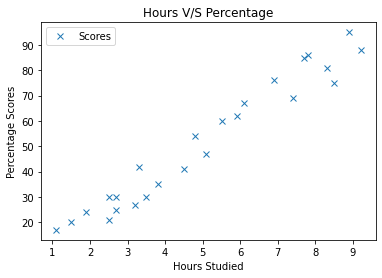

In [30]:
s_data.plot(x="Hours", y="Scores", style="x") #ascertains what is to be plotted from the table on the x and y axes, and also the pattern for the plot
plot.title("Hours V/S Percentage") #title of the graph
plot.xlabel("Hours Studied") #x-axis label
plot.ylabel("Percentage Scores") #y-axis label
plot.show() #displays the graph

4) Storing Data in separate variables

In [31]:
X=s_data.iloc[:, :-1].values #storing the hours values in X (in 2D array form, or else prediction cannot be done)
Y=s_data.iloc[:, -1].values #storing the scores values in Y
print("Size of X:", X.shape) #to show that X is in the 2D form
print("Size of Y:", Y.shape) #shows the dimensions of Y

Size of X: (25, 1)
Size of Y: (25,)


5) Dividing the data for training

In [32]:
from sklearn.model_selection import train_test_split #importing the train_test_split to divide the given data into training part and testing part
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #stating how many entries are to be trained and how many to be used for testing
print("List of Data(X) used as test data:\n", X_test) #to display the data which will be used for testing

List of Data(X) used as test data:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


6) Using the training model to find line of best fit, and comparing it with given data

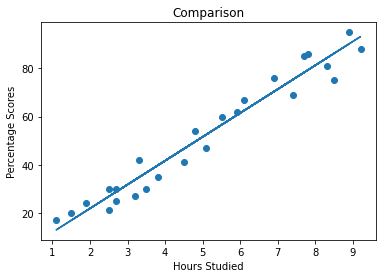

Slope of line: 9.910656480642237
Intercept on Y-axis: 2.018160041434683


In [33]:
from sklearn.linear_model import LinearRegression #importing Linear Regression to find best fit line
regressor = LinearRegression() #creating object regressor for class LinearRegression()
regressor.fit(X_train, Y_train) #using fit function to create the line of best fit
line= regressor.coef_*X+regressor.intercept_ #using the returned variables to create line using y=mx+c formula
plot.scatter(X, Y) #creates a scattered plot of our original given data
plot.plot(X, line) #plots a graph of the line of best fit
plot.title("Comparison") #title of graph
plot.xlabel("Hours Studied") #x-axis label
plot.ylabel("Percentage Scores") #y-axis label
plot.show() #displays the graph
print("Slope of line:", regressor.coef_[0]) #shows slope of line of best fit
print("Intercept on Y-axis:", regressor.intercept_) #shows y-intercept of line of best fit

7) Showing the difference between actual values and predicted values of the test data

In [34]:
Y_pred=regressor.predict(X_test) #predicts values for the chosen test values correspionding to the line of best fit
df=pd.DataFrame({"ACTUAL":Y_test, "PREDICTED":Y_pred}) #creates dataframe to compare the actual and predicted values
print(df) #displays the dataframe table

   ACTUAL  PREDICTED
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


8) Finding the mean absolute error in the predicted values

In [35]:
from sklearn.metrics import mean_absolute_error #importing the function to find mean absolute error
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred)) #using the function to find the mean absolute error in our predictions

Mean Absolute Error: 4.183859899002975


9) Using the line of best fit to predict the scores for user-inputted values

In [36]:
hrs_inp=np.array([list(map(float, input("Enter the number of hours (can be multiple inputs):\n").split()))]) #taking user inputs for number of hours
print("Shape of entered array:", hrs_inp.shape) #displaying dimensions of input variable
hrs_inp=hrs_inp.reshape(-1,1) #reshaping the array to make it in the required 2D form for prediction
print("Shape of reshaped array:", hrs_inp.shape) #displays dimensions of reshaped array
pred=regressor.predict(hrs_inp) #stores predicted values corresponding to input given
hrs_inp=hrs_inp.reshape(-1) #reshaping the array again to store it in dataframe
print("Shape of array reshaped again:", hrs_inp.shape) #displays dimensions of reshaped array
df2=pd.DataFrame({"No. of Hours":hrs_inp, "Predicted Score":pred}) #making dataframe consisting of input values and corresponding predictions
print(df2) #printing dataframe table

Shape of entered array: (1, 10)
Shape of reshaped array: (10, 1)
Shape of array reshaped again: (10,)
   No. of Hours  Predicted Score
0           0.5         6.973488
1           1.0        11.928817
2           1.5        16.884145
3           2.0        21.839473
4           2.5        26.794801
5           3.0        31.750129
6           3.5        36.705458
7           4.0        41.660786
8           4.5        46.616114
9           5.0        51.571442
